In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    roc_auc_score,
    balanced_accuracy_score,
    roc_curve,
)


In [13]:
df = pd.read_csv("PastLoans.csv")


def replace_digital3(row):
    if row["digital3"] == 0:
        if row["digital1"] != 0 and row["digital2"] != 0:
            return (row["digital1"] + row["digital2"]) / 2
        elif row["digital1"] != 0:
            return row["digital1"]
        elif row["digital2"] != 0:
            return row["digital2"]
    return row["digital3"]


df["digital3"] = df.apply(replace_digital3, axis=1)

In [14]:
df.drop(["digital1", "digital2"], axis=1, inplace=True)

In [15]:
df["log_income"] = np.log1p(df["income"])

df["income"] = StandardScaler().fit_transform(df["income"].values.reshape(-1, 1))


In [16]:
df = pd.get_dummies(df, columns=["employment", "sex"], drop_first=True)

In [17]:
df

,married,income,digital3,default,log_income,employment_retired,employment_student,employment_unemployed,sex_M
0,0,-0.387029,0.738735,0,0.000000,False,False,True,True
1,1,0.154879,0.733947,0,10.170035,False,False,False,True
2,1,-0.141896,0.652496,0,9.376787,False,False,False,True
3,1,-0.387029,0.000000,0,0.000000,False,False,True,True
4,1,-0.256056,0.203202,0,8.750049,True,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,0,-0.292297,0.876951,0,8.426174,False,True,False,False
99996,0,0.004893,0.556855,0,9.846017,False,False,False,True
99997,1,0.009854,0.722149,0,9.858595,False,False,False,True
99998,1,0.724745,0.532715,0,10.888632,False,False,False,True


In [18]:
X = df.drop("default", axis=1)

y = df["default"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Models to Try
1. Logistic Regression
2. Decision Trees
3. Random Forest
4. GBM
5. SVM
6. KNN
7. Naive Bayes
8. Neural Network
9. Logit Boost
10. Elastic Net
11. Bayesian LR
12. H2O
13. Balanced Bagging Classifier (imblearn)


In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1200, class_weight="balanced")

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print("Logistic Regression")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

Logistic Regression
Accuracy:  0.6141
Balanced Accuracy:  0.6759437469069165
              precision    recall  f1-score   support

           0       0.96      0.60      0.74     18011
           1       0.17      0.75      0.28      1989

    accuracy                           0.61     20000
   macro avg       0.56      0.68      0.51     20000
weighted avg       0.88      0.61      0.69     20000

ROC AUC:  0.6759437469069165


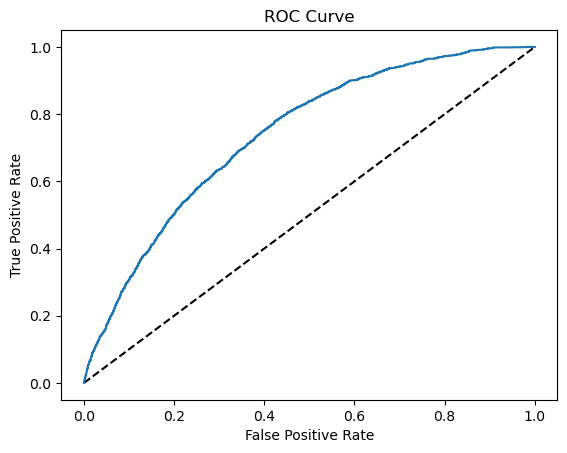

In [27]:
# Plot probabilities of incorrect predictions

y_pred_prob = lr_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Random Forest")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))


Random Forest
Accuracy:  0.8777
Balanced Accuracy:  0.5342738847459819
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     18011
           1       0.24      0.11      0.15      1989

    accuracy                           0.88     20000
   macro avg       0.57      0.53      0.54     20000
weighted avg       0.84      0.88      0.86     20000

ROC AUC:  0.5342738847459819


In [22]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Decision Tree")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))


Decision Tree
Accuracy:  0.8384
Balanced Accuracy:  0.5357105521710812
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     18011
           1       0.17      0.16      0.16      1989

    accuracy                           0.84     20000
   macro avg       0.54      0.54      0.54     20000
weighted avg       0.83      0.84      0.84     20000

ROC AUC:  0.5357105521710812


In [24]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print("Gradient Boosting")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))


Gradient Boosting
Accuracy:  0.9004
Balanced Accuracy:  0.5010348265189262
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     18011
           1       0.38      0.00      0.00      1989

    accuracy                           0.90     20000
   macro avg       0.64      0.50      0.48     20000
weighted avg       0.85      0.90      0.85     20000

ROC AUC:  0.5010348265189261


In [26]:
# XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("XGBoost")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))


XGBoost
Accuracy:  0.65075
Balanced Accuracy:  0.670128673112144
              precision    recall  f1-score   support

           0       0.95      0.65      0.77     18011
           1       0.18      0.69      0.28      1989

    accuracy                           0.65     20000
   macro avg       0.56      0.67      0.53     20000
weighted avg       0.87      0.65      0.72     20000

ROC AUC:  0.6701286731121439


In [28]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [29]:
# MLP Classifier

from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state=42)

mlp_model.fit(X_train_smote, y_train_smote)

y_pred = mlp_model.predict(X_test)

print("MLP Classifier")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))


MLP Classifier
Accuracy:  0.5826
Balanced Accuracy:  0.6779095306792433
              precision    recall  f1-score   support

           0       0.96      0.56      0.71     18011
           1       0.17      0.80      0.28      1989

    accuracy                           0.58     20000
   macro avg       0.56      0.68      0.49     20000
weighted avg       0.88      0.58      0.66     20000

ROC AUC:  0.6779095306792433


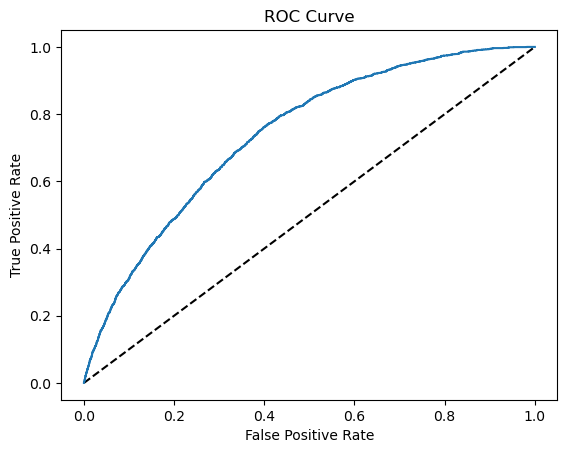

In [30]:
# Plot probabilities of incorrect predictions

y_pred_prob = mlp_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


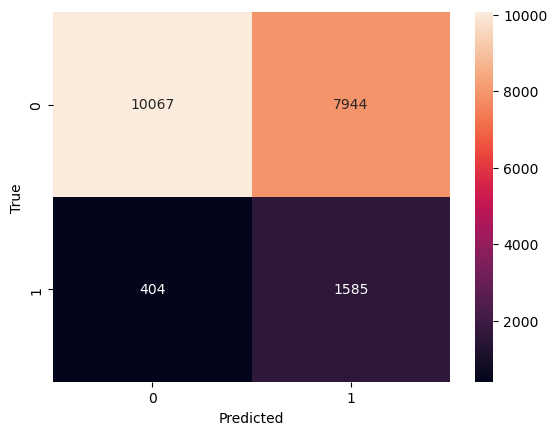

In [32]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [33]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components you want
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA features
X_pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])

# Concatenate the PCA features with the original data
X = pd.concat([X, X_pca_df], axis=1)

X.head()

,married,income,digital3,log_income,employment_retired,employment_student,employment_unemployed,sex_M,PCA1,PCA2
0,0,-0.387029,0.738735,0.000000,False,False,True,True,-7.883155,0.335787
1,1,0.154879,0.733947,10.170035,False,False,False,True,2.331331,-0.048537
2,1,-0.141896,0.652496,9.376787,False,False,False,True,1.517539,-0.275625
3,1,-0.387029,0.000000,0.000000,False,False,True,True,-7.841934,0.300103
4,1,-0.256056,0.203202,8.750049,True,False,False,False,0.891399,-0.390752


In [34]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [37]:
# SMOTE ON pca train

X_train_pca_smote, y_train_pca_smote = smote.fit_resample(X_train_pca, y_train_pca)

In [38]:
# MLP Classifier with PCA

mlp_model_pca = MLPClassifier(random_state=42)

mlp_model_pca.fit(X_train_pca_smote, y_train_pca_smote)

y_pred_pca = mlp_model_pca.predict(X_test_pca)

print("MLP Classifier with PCA")
print("Accuracy: ", accuracy_score(y_test_pca, y_pred_pca))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test_pca, y_pred_pca))
print(classification_report(y_test_pca, y_pred_pca))
print("ROC AUC: ", roc_auc_score(y_test_pca, y_pred_pca))


MLP Classifier with PCA
Accuracy:  0.60075
Balanced Accuracy:  0.6783709687049803
              precision    recall  f1-score   support

           0       0.96      0.58      0.72     18011
           1       0.17      0.78      0.28      1989

    accuracy                           0.60     20000
   macro avg       0.56      0.68      0.50     20000
weighted avg       0.88      0.60      0.68     20000

ROC AUC:  0.6783709687049803


In [43]:
df = pd.read_csv("PastLoans.csv")

In [44]:
df

,sex,employment,married,income,digital1,digital2,digital3,default
0,M,unemployed,0,0,0.749267,0.422656,0.738735,0
1,M,employed,1,26108,0.697428,0.596361,0.733947,0
2,M,employed,1,11810,0.000000,0.652496,0.000000,0
3,M,unemployed,1,0,0.000000,0.000000,0.000000,0
4,F,retired,1,6310,0.000000,0.041123,0.203202,0
...,...,...,...,...,...,...,...,...
99995,F,student,0,4564,0.000000,0.333091,0.876951,0
99996,M,employed,0,18882,0.000000,0.367979,0.556855,0
99997,M,employed,1,19121,0.858688,0.508737,0.722149,0
99998,M,employed,1,53563,0.736672,0.328757,0.000000,0


In [45]:
df_default = df[df["default"] == 1]

In [50]:
df_default["income"].max()

123814

<Axes: >

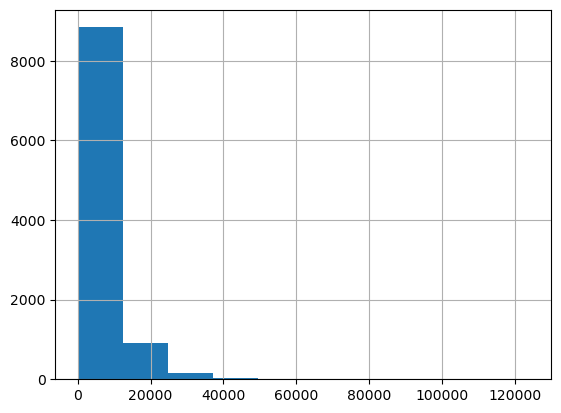

In [46]:
df_default["income"].hist()

<Axes: >

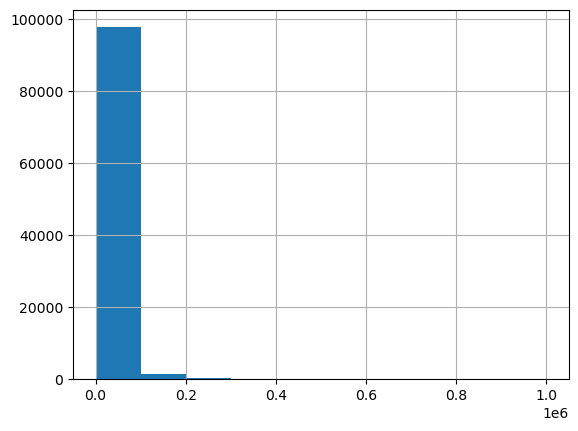

In [49]:
df["income"].hist()


C:\Users\ameya\AppData\Local\Temp\ipykernel_27208\4287195999.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_defaulters = df[df["default"] == 1].groupby("income_bin").size()
C:\Users\ameya\AppData\Local\Temp\ipykernel_27208\4287195999.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_bin = df.groupby("income_bin").size()


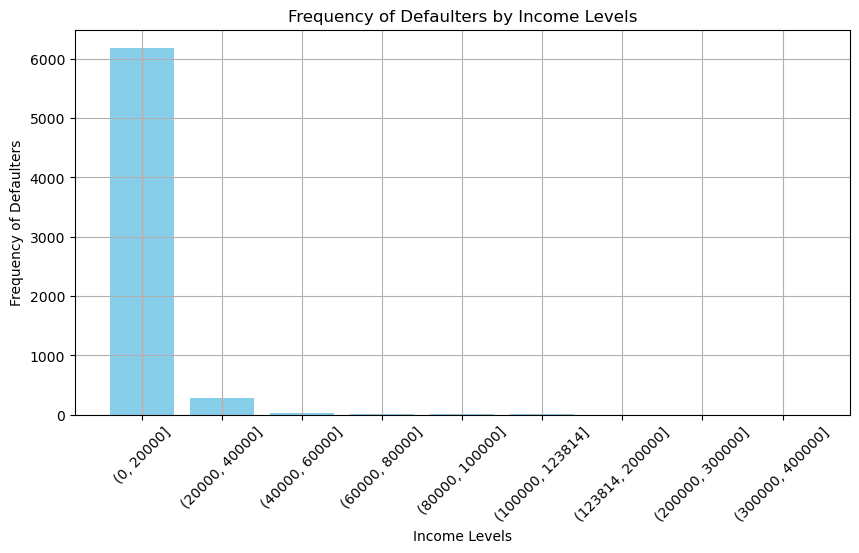

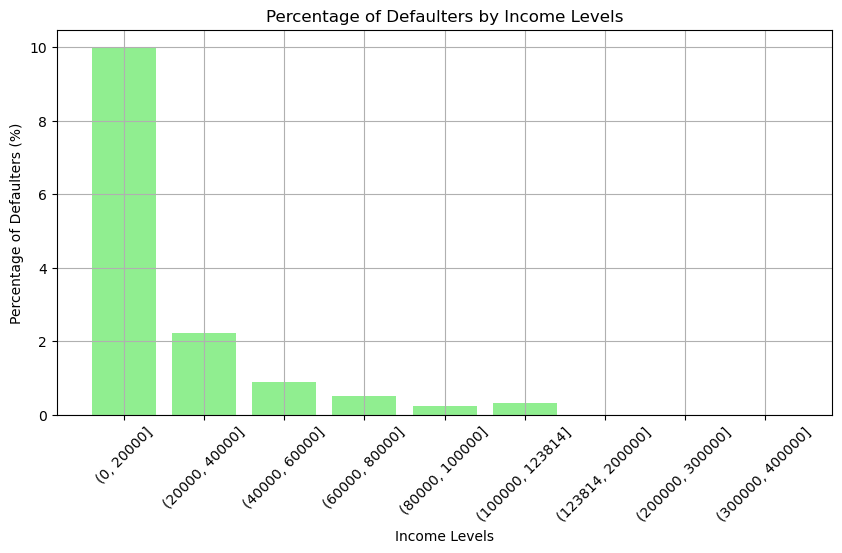

In [51]:
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 123814, 200000, 300000, 400000]
df["income_bin"] = pd.cut(df["income"], bins=income_bins)

# Calculate frequency of defaulters per income bin
freq_defaulters = df[df["default"] == 1].groupby("income_bin").size()


# Calculate percentage of defaulters per income bin
total_per_bin = df.groupby("income_bin").size()
percent_defaulters = (freq_defaulters / total_per_bin) * 100

# Plot frequency of defaulters
plt.figure(figsize=(10, 5))
plt.bar(freq_defaulters.index.astype(str), freq_defaulters, color="skyblue")
plt.title("Frequency of Defaulters by Income Levels")
plt.xticks(rotation=45)
plt.xlabel("Income Levels")
plt.ylabel("Frequency of Defaulters")
plt.grid(True)
plt.show()

# Plot percentage of defaulters
plt.figure(figsize=(10, 5))
plt.bar(percent_defaulters.index.astype(str), percent_defaulters, color="lightgreen")
plt.title("Percentage of Defaulters by Income Levels")
plt.xticks(rotation=45)
plt.xlabel("Income Levels")
plt.ylabel("Percentage of Defaulters (%)")
plt.grid(True)
plt.show()

In [52]:
df_20000 = df[df["income"] <= 20000]
df_40000 = df[(df["income"] > 20000) & (df["income"] <= 40000)]
df_60000 = df[(df["income"] > 40000) & (df["income"] <= 60000)]
df_80000 = df[(df["income"] > 60000) & (df["income"] <= 80000)]
df_100000 = df[(df["income"] > 80000) & (df["income"] <= 100000)]
df_high_income = df[df["income"] > 100000]

In [54]:
# Get dummies for each income df for sex, employment
df_20000 = pd.get_dummies(df_20000, columns=["employment", "sex"], drop_first=True)
df_40000 = pd.get_dummies(df_40000, columns=["employment", "sex"], drop_first=True)
df_60000 = pd.get_dummies(df_60000, columns=["employment", "sex"], drop_first=True)
df_80000 = pd.get_dummies(df_80000, columns=["employment", "sex"], drop_first=True)
df_100000 = pd.get_dummies(df_100000, columns=["employment", "sex"], drop_first=True)
df_high_income = pd.get_dummies(
    df_high_income, columns=["employment", "sex"], drop_first=True
)

,married,income,digital1,digital2,digital3,income_bin,employment_retired,employment_student,employment_unemployed,sex_M
0,0,0,0.749267,0.422656,0.738735,NaN,False,False,True,True
2,1,11810,0.000000,0.652496,0.000000,"(0.0, 20000.0]",False,False,False,True
3,1,0,0.000000,0.000000,0.000000,NaN,False,False,True,True
4,1,6310,0.000000,0.041123,0.203202,"(0.0, 20000.0]",True,False,False,False
5,1,11511,0.683078,0.694442,0.862871,"(0.0, 20000.0]",False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
99994,0,0,0.524634,0.858573,0.732859,NaN,False,True,False,False
99995,0,4564,0.000000,0.333091,0.876951,"(0.0, 20000.0]",False,True,False,False
99996,0,18882,0.000000,0.367979,0.556855,"(0.0, 20000.0]",False,False,False,True
99997,1,19121,0.858688,0.508737,0.722149,"(0.0, 20000.0]",False,False,False,True


In [57]:
# Model 1
X_20000 = df_20000.drop(["default", "digital1", "digital2", "income_bin"], axis=1)
y_20000 = df_20000["default"]

X_train_20000, X_test_20000, y_train_20000, y_test_20000 = train_test_split(
    X_20000, y_20000, test_size=0.2, random_state=42, stratify=y_20000
)

lr_model_20000 = LogisticRegression(max_iter=1200, class_weight="balanced")

lr_model_20000.fit(X_train_20000, y_train_20000)

y_pred_20000 = lr_model_20000.predict(X_test_20000)
print("Logistic Regression")
print("Accuracy: ", accuracy_score(y_test_20000, y_pred_20000))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test_20000, y_pred_20000))
print(classification_report(y_test_20000, y_pred_20000))
print("ROC AUC: ", roc_auc_score(y_test_20000, y_pred_20000))


Logistic Regression
Accuracy:  0.5857703506773009
Balanced Accuracy:  0.6294135338030393
              precision    recall  f1-score   support

           0       0.93      0.57      0.71     13874
           1       0.18      0.69      0.29      1924

    accuracy                           0.59     15798
   macro avg       0.56      0.63      0.50     15798
weighted avg       0.84      0.59      0.66     15798

ROC AUC:  0.6294135338030393


In [58]:
# Model 2
X_40000 = df_40000.drop(["default", "digital1", "digital2", "income_bin"], axis=1)
y_40000 = df_40000["default"]

X_train_40000, X_test_40000, y_train_40000, y_test_40000 = train_test_split(
    X_40000, y_40000, test_size=0.2, random_state=42, stratify=y_40000
)

lr_model_40000 = LogisticRegression(max_iter=1200, class_weight="balanced")

lr_model_40000.fit(X_train_40000, y_train_40000)

y_pred_40000 = lr_model_40000.predict(X_test_40000)

print("Logistic Regression")
print("Accuracy: ", accuracy_score(y_test_40000, y_pred_40000))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test_40000, y_pred_40000))
print(classification_report(y_test_40000, y_pred_40000))
print("ROC AUC: ", roc_auc_score(y_test_40000, y_pred_40000))


Logistic Regression
Accuracy:  0.564945226917058
Balanced Accuracy:  0.6117571428571429
              precision    recall  f1-score   support

           0       0.99      0.56      0.72      2500
           1       0.03      0.66      0.06        56

    accuracy                           0.56      2556
   macro avg       0.51      0.61      0.39      2556
weighted avg       0.97      0.56      0.70      2556

ROC AUC:  0.6117571428571428
